## EDA for the dataset custom

Finding class balance, and trying to understand the dataset to a deeper level from manually annotated dataset



In [1]:
import os # File 
import cv2 # Opencv for images
import sys
import yaml
import glob
import torch
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ultralytics import YOLO # For obeject detection
import albumentations as A # For image augmentation
from albumentations.pytorch import ToTensorV2 # For image formating
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
# Suppress all warnings
import warnings

In [2]:
warnings.filterwarnings("ignore") # Suppress all warnings
# Import msaai from parent folder
import msaai 

In [3]:
# Create direcories to organize images and cleanup for to avoid duplicate images 
dataset_base_dir = "../datasets/"
# Source directory containing all raw manually annotated images
manual_source_images_dir = os.path.join(dataset_base_dir, "manually_annotated/raw_images")
manual_source_labels_dir = os.path.join(dataset_base_dir, "manually_annotated/raw_labels")

# Create manually annotated directories
manual_train_images_dir = os.path.join(dataset_base_dir, "manually_annotated/images/train")
manual_train_labels_dir = os.path.join(dataset_base_dir, "manually_annotated/labels/train")
manual_val_images_dir = os.path.join(dataset_base_dir, "manually_annotated/images/val")
manual_val_labels_dir = os.path.join(dataset_base_dir, "manually_annotated/labels/val")

# Source directory containing all raw unannotated images 
raw_images_dir = os.path.join(dataset_base_dir, "raw_images")



# Define directories to reset
directories_to_reset = [
    # manually annotated directories
    manual_train_images_dir,
    manual_train_labels_dir,
    manual_val_images_dir,
    manual_val_labels_dir 
]
# Reset directories
msaai.reset_directories(directories_to_reset)

print("Directories reset and ready for use.")

Deleted existing directory: ../datasets/manually_annotated/images/train
Recreated directory: ../datasets/manually_annotated/images/train
Deleted existing directory: ../datasets/manually_annotated/labels/train
Recreated directory: ../datasets/manually_annotated/labels/train
Deleted existing directory: ../datasets/manually_annotated/images/val
Recreated directory: ../datasets/manually_annotated/images/val
Deleted existing directory: ../datasets/manually_annotated/labels/val
Recreated directory: ../datasets/manually_annotated/labels/val
Directories reset and ready for use.


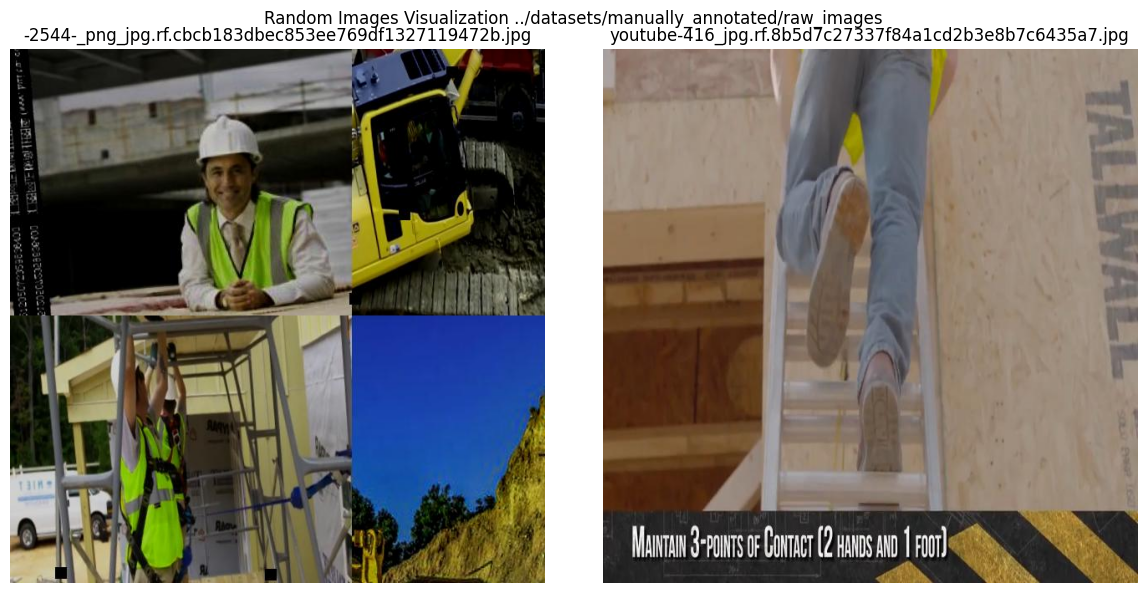

In [5]:

msaai.visualize_random_imgs(manual_source_images_dir, num_images=2)

## Analize information from labels

In [6]:
# Generate Dataset for EDA
# Annotated File: class-id x1 y1 x2 y2
col_names = ["class_id", "x_center", "y_center", "width", "height"]
data = {"filename": [],
        "class_id": [],
        "x_center" : [], 
        "y_center": [], 
        "width": [],
        "height": []}


ppe_classes = [
    'Hardhat',
    'Mask',
    'NO-Hardhat',
    'NO-Mask',
    'NO-Safety Vest',
    'Person',
    'Safety Cone',
    'Safety Vest',
    'Machinery',
    'Vehicle']

data_manual = pd.DataFrame(data)
label_files = [
    f for f in os.listdir(manual_source_labels_dir) 
]
for file_name in label_files:
    # Load file and boxes on dataframe
    label_path = os.path.join(manual_source_labels_dir, file_name)
    boxes = pd.read_csv(label_path, sep=r'\s+', names=col_names)
    boxes['filename'] = os.path.splitext(file_name)[0]
    boxes['class_name'] = [ppe_classes[f] for f in boxes["class_id"]]

    data_manual = pd.concat([data_manual, boxes], ignore_index=True)

data_manual.head()

,filename,class_id,x_center,y_center,width,height,class_name
0,scene1_hat_4,0.0,0.553188,0.196703,0.081656,0.074938,Hardhat
1,scene1_hat_4,4.0,0.541445,0.386859,0.154359,0.206937,NO-Safety Vest
2,scene1_hat_4,5.0,0.504531,0.470773,0.266219,0.625328,Person
3,scene1_hat_4,3.0,0.548164,0.273031,0.062641,0.049812,NO-Mask
4,scene3_none_4,3.0,0.489977,0.081734,0.055016,0.066344,NO-Mask


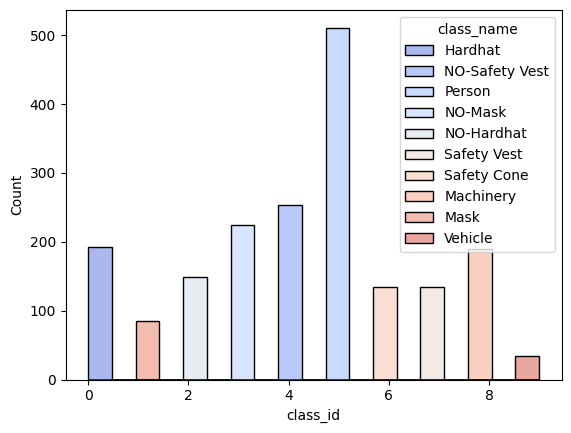

In [9]:

sns.histplot(data=data_manual, x= "class_id", palette="coolwarm", hue="class_name")
#legend = plt.legend(labels=data_manual["class_name"], title='Class', loc='upper left', borderpad=1)
#legend.get_frame().set_facecolor('#f9f9f9')  # Light grey background color
#legend.get_frame().set_edgecolor('black')  # Black border color
#legend.get_frame().set_alpha(0.6)  # Slightly transparent
#plt.setp(legend.get_texts(), fontsize='10', fontname='Arial')
plt.show()
